## Assignment 4
### Exercise 1

Suppose we have a neural network for predicting the time between hospital readmissions for a certain subset of patients. Such a network would depends on many parameters, but for simplicity, let's assume there's only two parameters: a and b. Each parameter lies between 0 and 1 and represents the weights of two "synapses" in our model.

Using the API at e.g.

http://ramcdougal.com/cgi-bin/error_function.py?a=0.4&b=0.2 (Links to an external site.)

one can find the prediction errors in arbitrary units of running our model with specified parameters (here a=0.4 and b=0.2, but you can change that).

#### 1.1 Implement a two-dimensional version of the gradient descent algorithm to find optimal choices of a and b. (7 points) (Optimal here means values that minimize the error.) See slides 12 for a 1-dimensional implementation of the algorithm.



In [1]:
import time
import random
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def f(a, b):
    return float(requests.get(f"http://ramcdougal.com/cgi-bin/error_function.py?a={a}&b={b}", headers={"User-Agent": "MyScript"}).text)

In [6]:
def faprime(a,b):
  h = 1e-4
  return (f(a+h,b) - f(a,b))/h

def fbprime(a,b):
  h = 1e-4
  return (f(a,b+h) - f(a,b))/h

In [22]:
def gradient_descent(a0,b0,steps,gamma,limit):
  f0 = f(a0,b0)
  for i in range(steps):
    fap = faprime(a0,b0)
    fbp = fbprime(a0,b0)
    ax = a0 - gamma * fap
    bx = b0 - gamma * fbp
    fx = f(ax,bx)
    print(ax,bx,fx)
    if abs(fx-f0) <= limit:
      print(fx-f0)
      break
    #UPDATE
    a0, b0 = ax, bx
    f0 = fx  

In [29]:
gradient_descent(0.4,0.2,30,0.2,1e-7)

0.7743400000000286 0.16273999999996108 1.0117763896
0.6994720000000229 0.1701920000001465 1.00047511494
0.7144455999999352 0.16870160000028706 1.00001821001
0.7114508799999527 0.1689996800000813 1.0000009046
0.7120498199997712 0.1689400600000333 1.00000001822
0.7119300199996289 0.1689519800001314 1.00000002161
3.3900000584452528e-09


#### 1.2 Explain how you estimate the gradient given that you cannot directly compute the derivative (3 points), identify any numerical choices -- including but not limited to stopping criteria -- you made (3 points), and justify why you think they were reasonable choices (3 points).

The way the calculation is completed is following the algorithm of Explicit Eulers: 

f'(a) = [f(a+h,b) - f(a,b)]/ h

f'(b) = [f(a,b+h) - f(a,b)]/ h

updated f: f(a,b) = f(a0-gamma * f'(a), b0- gamma*f'(b))

The way the gradient implemented was 1) find f'(a) and f'(b), which is the derivative of f for a and b; 2) Then for each step of the iterative algorithm, we use the algorithm to calculate the new f based on the estimated a and b based on updated a, b, f; 3) if the calculation does not reaches the limit, namely, the difference between gradient change not as small as the set limit, we continue until completed all steps defined in the function are completed; if the difference is small enough before completing all defined steps, we stop too.

numerical choices:

stepsize h = 1e-4
a = 0.4
b = 0.2
learning rate = 0.2
limit of gradient change is: 1e-7

a, b were set to be 0.4, 0.2 as suggested in the question. I tested learning rate of 0.1, 0.2, 0.3 and found that learning rate of 0.2 is the most optimal learning rate that converges the fastest. Then I used  a step size of 1e-4 because it should be small but not too small that the derivative would not be moving. The limit of gradient change is set to be 1e-7. I tested 1e-3, 1e-5, 1e-7, and found that the limit of 1e-7 is closest to the global minimum. 



#### 1.3 It so happens that this error function has a local minimum and a global minimum. Find both locations (i.e. a, b values) querying the API as needed (5 points) and identify which corresponds to which (2 point). Briefly discuss how you would have tested for local vs global minima if you had not known how many minima there were. (2 points)

In [25]:
gradient_descent(0.1,0.1,20,0.3,1e-8)

0.16957000000018532 0.4533700000000195 1.1576772418
0.1973980000005259 0.5947180000005602 1.10923512993
0.2085292000009286 0.6512572000010429 1.1014803318
0.21298168000095644 0.6738728800011028 1.10023794002
0.2147626900011023 0.6829191700008618 1.10003850743
0.2154750700014251 0.6865376800011646 1.10000633857
0.21576001000168646 0.6879850600016834 1.1000010877
0.215874010001793 0.6885640300016259 1.10000020594
0.21591958000156666 0.6887956000014682 1.10000004825
0.21593785000174606 0.6888882400018058 1.10000001635
0.21594514000234924 0.6889252900022068 1.10000000859
-7.760000197976069e-09


Based on the initial guess of a as 0.1, b as 0.1, we find that the gradient descent produces an error at the local minimum instead of a global minimum. 

local minimum: 
a = 0.21594514000234924; b = 0.6889252900022068; point = 1.10000000859;

global minimum:
a = 0.7083534400010191; b = 0.16930796000049747; point =  1.00004017672


To see whether an error like this would occur, I would set my learning rate high and have a high enough limit of gradient stop, large steps defined, to loop through the whole data and see if there is any change in decreasing and increasing trend inside the data. If there is spotted ones, I will try to start the gradient descent at different location of  a and b and see if there is different local minimas, and determine which one is the global minimum. 

### Exercise 2


#### 2.1 Modify the k-means code (or write your own) from slides8 to use the Haversine metric and work with our dataset (5 points). Note: since this algorithm uses (pseudo)randomness, you'll have to run it multiple times to get a sense of expected runtime. 

#### 2.2 Visualize your results with a color-coded scatter plot (5 points)

#### 2.3 Use this algorithm to cluster the cities data for k=5, 7, and 15. Run it several times to get a sense of the variation of clusters for each k (share your plots) (5 points);

#### 2.4 be sure to use an appropriate map projection (i.e. do not simply make x=longitude and y=latitude; 5 points).

#### 2.5 comment briefly on the diversity of results for each k. (5 points)

### Exercise 3
#### 3.1 In class, we discussed two different strategies for computing the Fibonacci sequence: directly with the recursive strategy, and recursive but modified using lru_cache. Implement both (yes, I know, I gave you implementations on the slides, but try to do this exercise from scratch as much as possible) (5 points)

In [32]:
# recursive strategy
def r(n):
  if n in (1,2):
    return 1
  return r(n-1) + r(n-2)

In [33]:
# recursive but modified using lru_cache
from functools import lru_cache

@lru_cache()
def r_lru(n):
  if n in (1,2):
    return 1
  return r_lru(n-1) + r_lru(n-2)

#### 3.2 time them as functions of n (5 points)
#### 3.3 display this in the way you think is best (5 points). 

In [43]:
from time import perf_counter
n = np.arange(30)
t_no_lru = np.zeros(len(n))
t_lru = np.zeros(len(n))

In [44]:
for i in n:
  #first no lru cache time count
  checkpoint1 = perf_counter()
  r(i+1)
  checkpoint2 = perf_counter()
  t_no_lru[i] = (checkpoint2-checkpoint1)

  #Second record with lru cache
  checkpoint3 = perf_counter()
  r_lru(i+1)
  checkpoint4 = perf_counter()
  t_lru[i] = (checkpoint4 - checkpoint3)


  

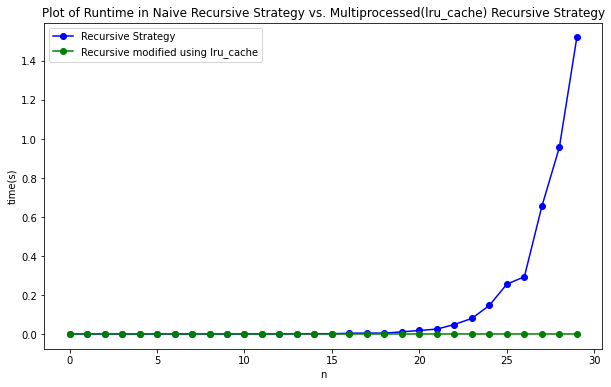

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(n, t_no_lru, '-ob', label = "Recursive Strategy")
plt.plot(n, t_lru, '-og', label = "Recursive modified using lru_cache")
plt.legend()
plt.xlabel('n')
plt.ylabel('time(s)')
plt.title('Plot of Runtime in Naive Recursive Strategy vs. Multiprocessed(lru_cache) Recursive Strategy') 
plt.show()   


#### 3.4 Discuss your choices (e.g. why those n and why you're displaying it that way; 5 points) and your results (5 points).

From the lecture we know that the time complexity of naive implementation is proportional to $\varphi^n$ , while the time complexity of lru_cache implemented strategy is O(n). Thus I chose n to be 30 because when n gets very large, the runtime of naive implementation will be too long. I display the graph of runtime for recursive strategy vs. with lru_cache recursive strategy using scatterplot, which does successfully shows the difference in time complexity. 

### Exercise 4 
#### 4.1 Implement a function that takes two strings and returns an optimal local alignment (6 points) and score (6 points) using the Smith-Waterman algorithm; insert "-" as needed to indicate a gap (this is part of the alignment points). Your function should also take and correctly use three keyword arguments with defaults as follows: match=1, gap_penalty=1, mismatch_penalty=1 (6 points). 